# 911 Calls Capstone Project

Modified by Natasha Rosa 

3/10/2019


Made this project for an udemy course -> [Python for Data Science and Machine Learning](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp) , updated original data set, answered original questions and added more using my Python and Data Science skills. 

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
**Import numpy and pandas**

In [2]:
import numpy as np 
import pandas as pd 

**Import visualization libraries and set %matplotlib inline.**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import plotly and set up**

**Read in the csv file as a dataframe called df**

In [8]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


**Check the head of df**

In [136]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [137]:
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [138]:
df['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [139]:
len(df['title'].unique())

141

In [140]:
df['title'].nunique()

141

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [141]:
x = df['title'].iloc[0]

In [142]:
x.split(':')[0]

'EMS'

In [143]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [144]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
423879    Traffic
423880    Traffic
423881    Traffic
423882    Traffic
423883        EMS
423884       Fire
423885    Traffic
423886    Traffic
423887        EMS
423888       Fire
423889    Traffic
423890       Fire
423891    Traffic
423892       Fire
423893       Fire
423894        EMS
423895        EMS
423896    Traffic
423897    Traffic
423898    Traffic
423899    Traffic
423900    Traffic
423901        EMS
423902    Traffic
423903    

**What is the most common Reason for a 911 call based off of this new column?**

In [145]:
df['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

In [146]:
df['Reason'].value_counts().head(1)

EMS    208676
Name: Reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

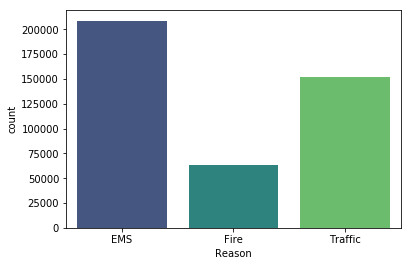

In [147]:
sns.countplot(x='Reason', data=df, palette='viridis')

**Made a version using Plotly**

In [148]:
df2 = pd.DataFrame(df['Reason'])

In [1]:
df2.head()

NameError: name 'df2' is not defined

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 10 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
Reason       423909 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 32.3+ MB


In [152]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [153]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [154]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [155]:
time = df['timeStamp'].iloc[0]

In [156]:
time.hour

17

In [157]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [158]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
5         15
6         16
7         16
8         16
9         17
10        17
11        16
12        17
13        17
14        17
15        17
16        17
17        17
18        17
19        17
20        17
21        17
22        17
23        18
24        17
25        18
26        18
27        18
28        18
29        18
          ..
423879     8
423880     8
423881     8
423882     8
423883     8
423884     8
423885     8
423886     8
423887     8
423888     8
423889     8
423890     8
423891     8
423892     8
423893     8
423894     8
423895     8
423896     8
423897     8
423898     8
423899     8
423900     8
423901     8
423902     8
423903     8
423904     8
423905     8
423906     8
423907     8
423908     8
Name: Hour, Length: 423909, dtype: int64

In [159]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [160]:
df['Month']

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
          ..
423879    11
423880    11
423881    11
423882    11
423883    11
423884    11
423885    11
423886    11
423887    11
423888    11
423889    11
423890    11
423891    11
423892    11
423893    11
423894    11
423895    11
423896    11
423897    11
423898    11
423899    11
423900    11
423901    11
423902    11
423903    11
423904    11
423905    11
423906    11
423907    11
423908    11
Name: Month, Length: 423909, dtype: int64

In [161]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [162]:
df['Day of Week']

0         3
1         3
2         3
3         3
4         3
5         3
6         3
7         3
8         3
9         3
10        3
11        3
12        3
13        3
14        3
15        3
16        3
17        3
18        3
19        3
20        3
21        3
22        3
23        3
24        3
25        3
26        3
27        3
28        3
29        3
         ..
423879    4
423880    4
423881    4
423882    4
423883    4
423884    4
423885    4
423886    4
423887    4
423888    4
423889    4
423890    4
423891    4
423892    4
423893    4
423894    4
423895    4
423896    4
423897    4
423898    4
423899    4
423900    4
423901    4
423902    4
423903    4
423904    4
423905    4
423906    4
423907    4
423908    4
Name: Day of Week, Length: 423909, dtype: int64

In [163]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [180]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [181]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [182]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

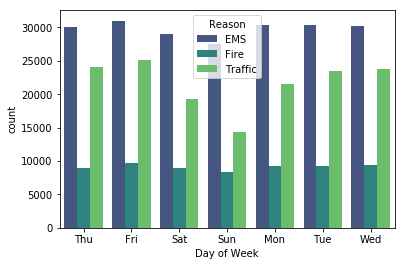

In [183]:
sns.countplot(x='Day of Week', data= df, hue='Reason', palette='viridis')

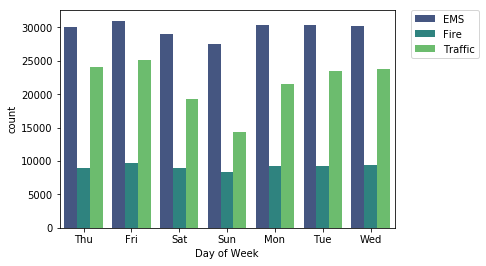

In [184]:
# To relocate the legend
sns.countplot(x='Day of Week', data= df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

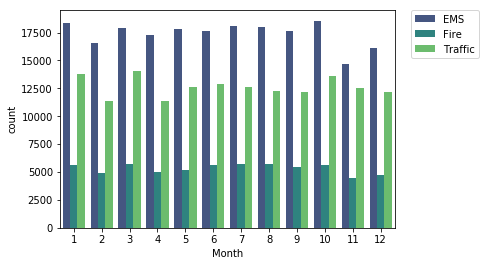

In [185]:
# To relocate the legend
sns.countplot(x='Month', data= df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [186]:
byMonth = df.groupby('Month').count()

In [187]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339,35339


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

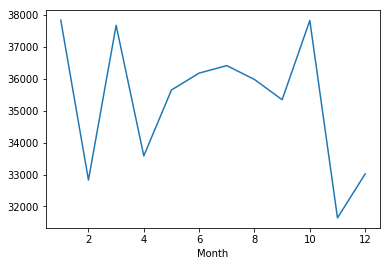

In [188]:
byMonth['lat'].plot()

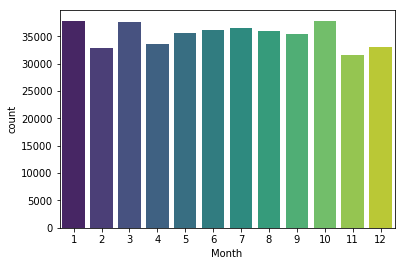

In [189]:
sns.countplot(x='Month', data =df, palette='viridis')

**Made a plotly version**

In [190]:
byMonth['lat'].iplot()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

In [191]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
0,1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824
1,2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828
2,3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666,37666
3,4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583,33583
4,5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644,35644
5,6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171,36171
6,7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405,36405
7,8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972,35972
8,9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339,35339
9,10,37815,37815,37815,32919,37815,37815,37809,37815,37815,37815,37815,37815,37815


C:\Users\n_ros\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



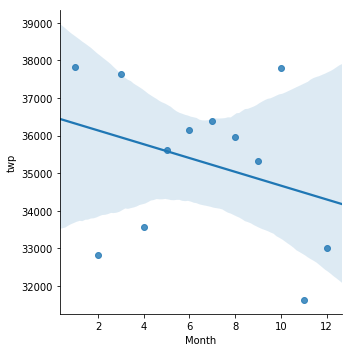

In [192]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [193]:
t = df['timeStamp'].iloc[0]

In [194]:
t

Timestamp('2015-12-10 17:10:52')

In [195]:
t.date()

datetime.date(2015, 12, 10)

In [196]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [197]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [198]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


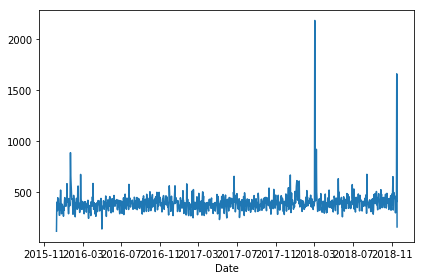

In [199]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [200]:
df.groupby('Date').count()['lat'].iplot()


**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

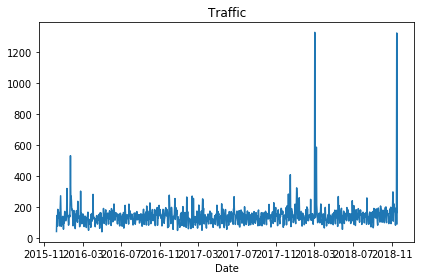

In [201]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

In [202]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].iplot()

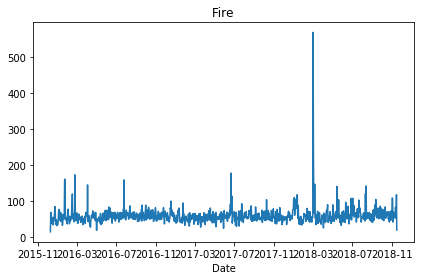

In [203]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

In [204]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].iplot()


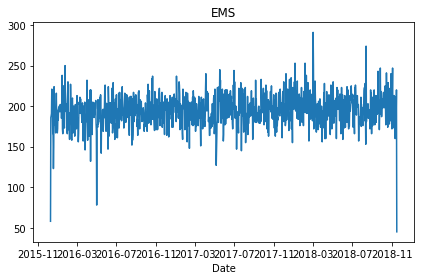

In [205]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [206]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].iplot()


____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [213]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486
Tue,1086,918,812,783,824,1075,1806,2912,3650,3563,...,3831,4087,4265,4396,3753,2960,2535,2147,1705,1350
Wed,1022,952,808,795,711,1040,1763,3060,3566,3528,...,3933,4149,4443,4487,3609,2927,2645,2236,1794,1399


**Now create a HeatMap using this new DataFrame.**

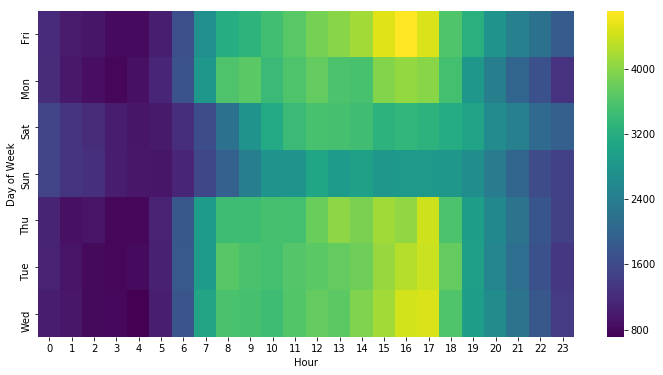

In [208]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

**Now create a clustermap using this DataFrame.**

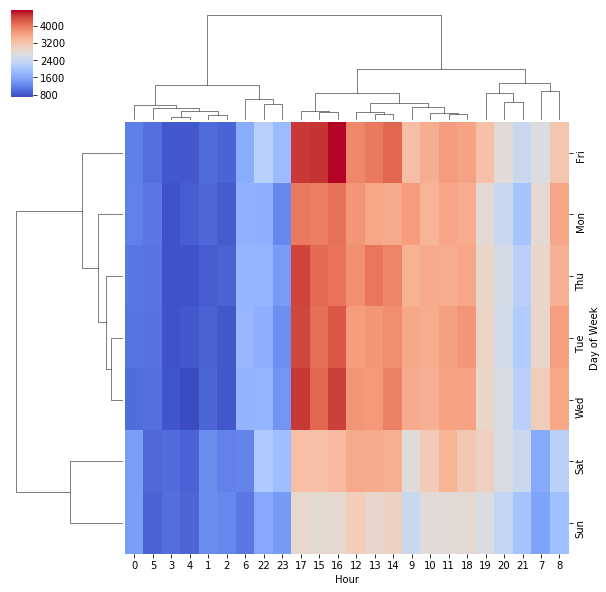

In [218]:
sns.clustermap(dayHour,cmap='coolwarm')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [211]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899
Tue,6118,4755,5090,4413,6203,5013,5488,5690,4930,5827,4823,4691
Wed,5488,5066,6076,4609,5749,5408,4794,6112,5156,5581,4907,4477


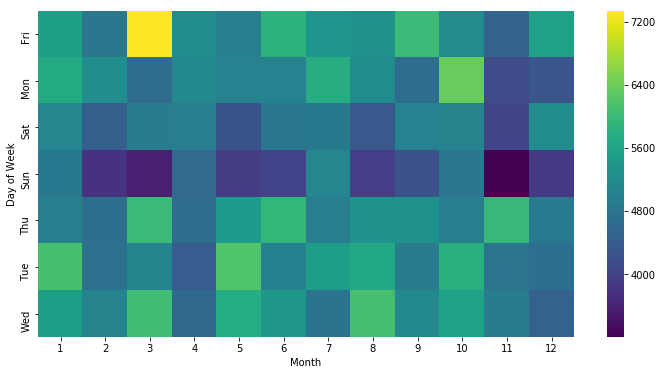

In [214]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

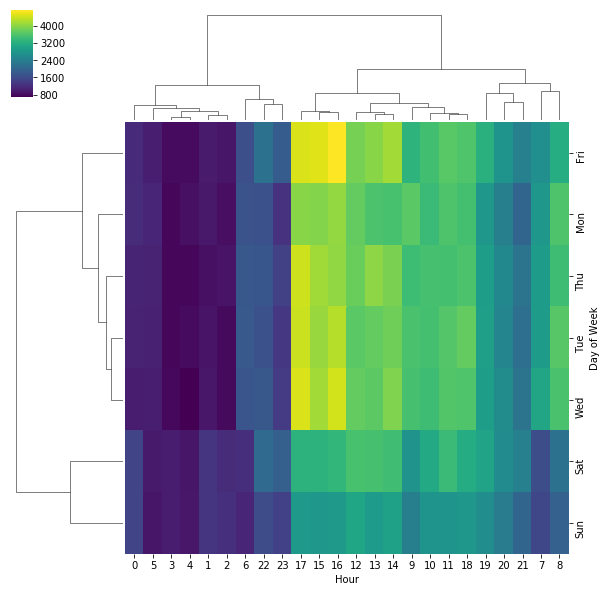

In [217]:
sns.clustermap(dayHour, cmap='viridis')